<a href="https://colab.research.google.com/github/rubygitflow/Higher-Math/blob/main/University_of_Artificial_Intelligence_Basic_Mathematics_Lesson_4_Probability_theory_Part2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Курс "Базовая математика"
# Занятие 4. Теория вероятности часть 2


In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt #Для отрисовки графиков
%matplotlib inline
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import poisson
from numpy.random import normal

from collections import Counter
import time

## ДЗ Light

**Задача 7**

Для задач 2 - 6 Вычислить среднее, дисперсию, скошенность, куртозис и 0.25 и 0.9 перцентили

In [2]:
def stats(distribution):
  # for example: 
  # 1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous
  # 2. http://espressocode.top/scipy-stats-tvar-function-python/
  mean, var, skew, kurt = distribution.stats(moments='mvsk') 
  print(f'''
  среднее: {mean}
  дисперсия: {var}
  скошенность: {skew}
  куртозис: {kurt}
  0.25 перцентилей: {distribution.ppf(0.25)}
  0.9 перцентилей: {distribution.ppf(0.9)}
  ''')

**Задача 8**

Для задач 2 - 6 Построить графики cdf и pdf

In [3]:
def cdf_pdf_distribution(distribution, arr_size = 29):
  # http://www.cse.chalmers.se/~richajo/dit862/L4/Lecture%204%20(normal%20distribution).html
  rx = np.linspace(-7,7,arr_size)
  cdf = [distribution.cdf(x) for x in rx]

  is_pmf, is_pdf = False, False
  try:
    pmf = [distribution.pmf(x) for x in rx]
    is_pmf = True
  except AttributeError:
    pdf = [distribution.pdf(x) for x in rx]
    is_pdf = True

  plt.figure(figsize=(8, 4))
  plt.plot(rx, cdf, label='Распределение вероятностей — Cumulative Distribution Function')
  if is_pmf: # discrete
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html
    plt.plot(rx, pmf, label='Плотность дискретного распределения — Probability Mass Function') 
  elif is_pdf: # continuous
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
    plt.plot(rx, pdf, label='Плотность непрерывного распределения — Probability Density Function')
  plt.legend()
  plt.grid(True)
  plt.show()


**Задача 1**
Непрерывная случайная величина X задана функцией плотности распределения:
$$f(x) =\left\{\begin{matrix}
 0 &, if x < 1  \\b*x
 &, if 1 \leq x< 5  \\ 0
 &, if x \geq  5
\end{matrix}\right.$$
Найти коэффициент b , Вычислить $P(1 \leq x <  3)$

In [ ]:
integral = integrate.quad(lambda x: x, 1, 5)
b = 1/integral[0]
P = b * integrate.quad(lambda x: x, 1, 3)[0]
print(f'''
integral = {integral}
b = {b}
P = {P}
''')


integral = (12.0, 1.3322676295501878e-13)
b = 0.08333333333333333
P = 0.3333333333333333



**Задача 2**

Случайная величина  ошибки взвешивания распределена по нормальному закону с нулевым математическим ожиданием и стандартным отклонением 4 грамма. Найти вероятность того, что очередное взвешивание будет проведено с ошибкой, не превышающей по модулю 6 грамм.

In [6]:
# по формуле
beta = 0. # мат. ожидание
alfa = 4.  # станд. отклонение
integral = 1 / (alfa * np.sqrt(2*np.pi)) * integrate.quad(lambda x: np.exp( -( ((x-beta)**2) / float((2 * alfa**2 )))), -6, 6)[0]
print(f'Probability: {integral}')

Probability: 0.866385597462284


In [7]:
# по библиотечной функции
distribution = norm(beta, alfa)
integral = distribution.cdf(6) - distribution.cdf(-6)
print(f'Probability: {integral}')

Probability: 0.8663855974622838


In [8]:
# Задача № 2.7
stats(distribution)


  среднее: 0.0
  дисперсия: 16.0
  скошенность: 0.0
  куртозис: 0.0
  0.25 перцентилей: -2.697959000784327
  0.9 перцентилей: 5.1262062621784015
  


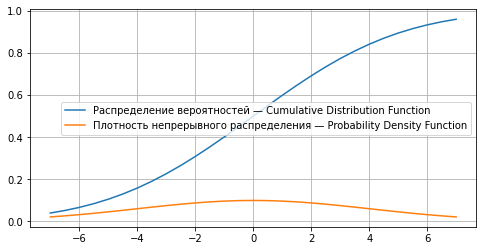

In [9]:
# Задача № 2.8
cdf_pdf_distribution(distribution)

**Задача 3**

Автобусы некоторого маршрута идут строго по расписанию и интервалом 5 минут. Составить функцию плотности случайной величины  X – времени ожидании очередного автобуса пассажиром, который наудачу подошёл к остановке. Найти вероятность того, что он будет ждать автобус не более 2x минут. 

In [10]:
print(f'''Имеем равномерное распределение:
с интервалом a = 0 мин; b = 5 мин
Функция плотности времени ожидания pdf(x) = 1/(b-a) = {1/(5-0)}
Вероятность P(x) = сумма вероятностей по числу исходов за 2 минуты =  {1/5 + 1/5}
''')

Имеем равномерное распределение:
с интервалом a = 0 мин; b = 5 мин
Функция плотности времени ожидания pdf(x) = 1/(b-a) = 0.2
Вероятность P(x) = сумма вероятностей по числу исходов за 2 минуты =  0.4



In [11]:
# Задача № 3.7
stats(uniform(0,5))


  среднее: 2.5
  дисперсия: 2.083333333333333
  скошенность: 0.0
  куртозис: -1.2
  0.25 перцентилей: 1.25
  0.9 перцентилей: 4.5
  


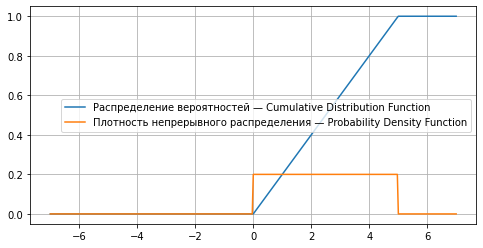

In [12]:
# Задача № 3.8
cdf_pdf_distribution(uniform(0,5),401)

**Задача 4**

Завод отправил в торговую сеть 600 изделий. Вероятность повреждения изделия в пути равна 0.0035. Найти вероятность того, что при транспортировке будет повреждено: а) ни одного изделия, б) ровно 4 изделия, в) более 5 изделий.

In [13]:
# https://www.matburo.ru/ex_tv.php?p1=tvbinr
start_time = time.time()
print('Задача с биномиальным распределением дискретной случайной величины')
n = 600
p = 0.0035
binomal = binom(n,p)
print(f"а): probability = {binomal.pmf(0)}") 
print(f"б): probability = {binomal.pmf(4)}") 
# до 6 изделий не считается
p_excl = 0
for x in range(6):
  p_excl += binomal.pmf(x)
p5plus = 1 - p_excl
print(f"в): probability = {p5plus}") 
print('Общее время: {:.5f}s'.format(time.time() - start_time))

Задача с биномиальным распределением дискретной случайной величины
а): probability = 0.12200617783091904
б): probability = 0.09926293982168545
в): probability = 0.02023757008224758
Общее время: 0.00437s


In [14]:
start_time = time.time()
print('Более экономичный вариант считается через распределение Пуассона')
n = 600
p = 0.0035
pssn = poisson(n*p)
print(f"а): probability = {pssn.pmf(0)}") 
print(f"б): probability = {pssn.pmf(4)}") 
p_excl = 0
for x in range(6):
  p_excl += pssn.pmf(x)
p5plus = 1 - p_excl
print(f"в): probability = {p5plus}") 
print('Общее время: {:.5f}s'.format(time.time() - start_time))

Более экономичный вариант считается через распределение Пуассона
а): probability = 0.1224564282529819
б): probability = 0.09923103592945072
в): probability = 0.02044908008963342
Общее время: 0.00420s


распределение Пуассона считает быстрее в 1,5 раза 

In [15]:
# Задача № 4.7
stats(pssn)


  среднее: 2.1
  дисперсия: 2.1
  скошенность: 0.6900655593423543
  куртозис: 0.47619047619047616
  0.25 перцентилей: 1.0
  0.9 перцентилей: 4.0
  


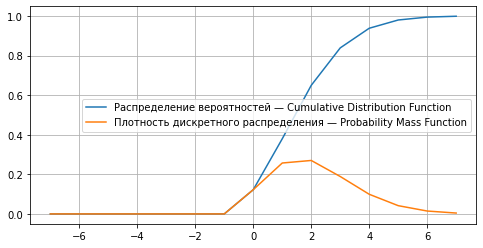

In [16]:
# Задача № 4.8
cdf_pdf_distribution(pssn,15)

**Задача 5**

Среднее число автомобилей, проходящих таможенный досмотр в течение часа, равно 2. Найти вероятность того, что: а) за 2 часа пройдут досмотр от 5 до 8 автомобилей; б) за полтора часа успеет пройти досмотр только 1 автомобиль.

In [17]:
# Пусть единица времени = 2 часа
pssn = poisson(2*2)
p_pass = 0
for x in range(5,9):
  p_pass += pssn.pmf(x)
print(f"а): probability = {p_pass}") 
# Пусть единица времени = 1.5 часа
pssn = poisson(2*1.5)
print(f"б): probability = {pssn.pmf(1)}") 

а): probability = 0.3497996303321422
б): probability = 0.14936120510359185


In [18]:
# Задача № 5.7
stats(poisson(2))


  среднее: 2.0
  дисперсия: 2.0
  скошенность: 0.7071067811865476
  куртозис: 0.5
  0.25 перцентилей: 1.0
  0.9 перцентилей: 4.0
  


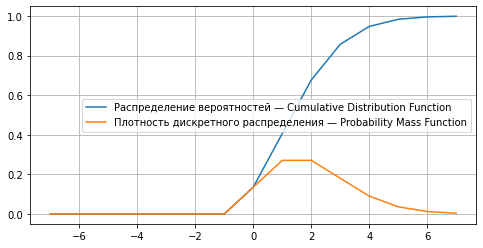

In [19]:
# Задача № 5.8
cdf_pdf_distribution(poisson(2),15)

**Задача 6**

Не пользуясь готовыми библиотеками для вычисления cdf/pdf/pmf, выполнить задание:
Интенивность звонков в колцентре составляет 90 звонков в час.

Рассчитать: 
1)
Вероятность ожидания звонка более 2.5 минут
2)
Прождать более 2-х минут если время ожидания уже составило 1 минуту

In [20]:
# Воспользуемся степенным распределением  в Пуассоновом процессе
lambda_ = 90/60. # 1.5- звонка в минуту
lambda_ = lambda_ * 2.5 # звонка в 2.5 мин
pdf =  integrate.quad(lambda x: lambda_*np.exp(-lambda_*x),  0, 1)[0]
print(f"1) probability of call delay = {1-pdf}")

lambda_ = 90/60. * 3 # звонка в 3 мин
pdf =  integrate.quad(lambda x: lambda_*np.exp(-lambda_*x),  0, 1)[0]
print(f"2) probability of call delay = {1-pdf}")

1) probability of call delay = 0.023517745856009076
2) probability of call delay = 0.011108996538242266


In [21]:
# Задача № 6.7
stats(poisson(90/60.))


  среднее: 1.5
  дисперсия: 1.5
  скошенность: 0.816496580927726
  куртозис: 0.6666666666666666
  0.25 перцентилей: 1.0
  0.9 перцентилей: 3.0
  


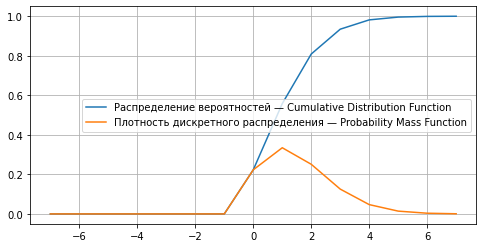

In [22]:
# Задача № 6.8
cdf_pdf_distribution(poisson(90/60.),15)

## PRO Вариант 1

**Задача 1**

На испытание поставлено 1200 однотипных ламп.
За первые 2000 ч работы отказало 70 ламп, а за интервал 3000–
4000 ч отказало еще 50 ламп. Определить частоту и интенсивность отказов электронных ламп в промежутке 3000–4000 ч работы.


In [26]:
# Задача на статистические показатели надежности: https://all4study.ru/proizvodstvo/kolichestvennye-pokazateli-nadezhnosti.html
# Объяснение решения задачи: http://libraryno.ru/8-1-reshenie-tipovyh-zadach-teor_nadejnosti/
amount = 1200 # общее количество ламп в поставке
count = amount - 70 # ламп на момент начала сбора статистики после 3000 часов работы
delta_time = 4000 - 3000 # часов на испытательном периоде
n_burnt_out = 50
P = n_burnt_out/amount/delta_time*100 # https://ru.wikipedia.org/wiki/%D0%A7%D0%B0%D1%81%D1%82%D0%BE%D1%82%D0%B0
print(f'Частота отказов (для всей партии): {round(P,4)} %/час')
λ = n_burnt_out/((count+(count-n_burnt_out))/2.)/delta_time*100 # https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%82%D0%B5%D0%BD%D1%81%D0%B8%D0%B2%D0%BD%D0%BE%D1%81%D1%82%D1%8C_%D0%BE%D1%82%D0%BA%D0%B0%D0%B7%D0%BE%D0%B2
print(f'Интенсивность отказов (для текущего количества работающих ламп): {round(λ,4)} %/час')

Частота отказов (для всей партии): 0.0042 %/час
Интенсивность отказов (для текущего количества работающих ламп): 0.0045 %/час


**Задача 2**

В течение некоторого периода времени производилось наблюдение за работой одного экземпляра радиолокационной станции. За весь период наблюдения было зафиксировано 15 отказов. До начала наблюдения станция проработала
258 часов, а к концу наблюдения наработка станции составила
1233 часа. Требуется определить среднюю наработку на отказ


In [28]:
# Объяснение решения задачи: http://libraryno.ru/8-1-reshenie-tipovyh-zadach-teor_nadejnosti/
print(f'''
Cредняя наработка на отказ — это отношение
количества работы за время надлюдений
к количеству отказов: {(1233 - 258)/15}
''')


Cредняя наработка на отказ — это отношение
количества работы за время надлюдений
к количеству отказов: 65.0




**Задача 3**

Система состоит из пяти приборов, вероятность исправной работы которых в течение времени t = 100 ч
равны: р1(100) = 0,9996; р2(100) = 0,9998; р3(100) = 0,9996;
р4(100) = 0,999; р5(100) = 0,9998. Требуется определить частоту
отказов системы в момент времени t = 100 ч.


In [29]:
# Объяснение решения задачи: http://oldwww.rgotups.ru/ru/kursi/imu/uml/20-39-3.pdf

p_100 = 1 - ((1 - 0.9996) + (1 - 0.9998) + (1 - 0.9996) + (1 - 0.999) + (1 - 0.9998))  # вероятности безотказной работы
lambda_100 = (1 - p_100) / 100 #  интенсивность отказов
print(f"Частота отказов: {lambda_100 * (1 - lambda_100 * 100)} раз/час")

Частота отказов: 2.1951599999998694e-05 раз/час


**Задача 4**

Вероятность безотказной работы преобразователя постоянного тока в переменный в течение t = 1000 ч равна
0,95. Для повышения надежности системы электроснабжения
на объекте имеется такой же преобразователь, который включается в работу при отказе первого. Требуется рассчитать вероятность безотказной работы и среднюю наработку до первого
отказа системы, состоящей из двух преобразователей.

In [31]:
# Объяснение решения задачи: https://studfile.net/preview/1972112/
p_1000 = 0.95 # вероятность исправной работы одного прибора
p_system_failure = (1-p_1000)**2 # вероятность отказа системы по условию И
uptime_p = 1 - p_system_failure 
print(f'Вероятность безотказной работы: {round(uptime_p,5)}')
lambda_1000 = (1 - p_1000) / 1000 #  интенсивность отказа одного прибора
t_mid = 1 / lambda_1000 # средняя наработка до первого отказа первого прибора
print(f'Средняя наработка до первого отказа системы: {round( t_mid + t_mid , 5)}') 

Вероятность безотказной работы: 0.9975
Средняя наработка до первого отказа системы: 40000.0


## PRO Вариант 2


Попытаться доказать утверждение центральной предельной теоремы о том, что сумма N независимых и одинаково распределенных случайных величин, отобранных практически из любого распределения, имеет распределение, близкое к нормальному. Для доказательства взять семплирования из семейства экспоненциальных распределений

Математически доказывать не нужно, достаточно проиллюстрировать графически верность утверждения.

Записать вывод о том, как размер выборки влияет на доказательство.

**Возьмём из лекции на рассмотрение задачу 2 для нормального распределения**

*Из пункта A ведётся стрельба из орудия вдоль прямой X. Предполагается, что дальность полёта распределена нормально с математическим ожиданием 1000 м и средним квадратическим отклонением 5 м. Определить сколько снарядов упадёт с перелётом от 5 до 70м.*

Пункты: [985, 988, 991, 994, 997, 1000, 1003, 1006, 1009, 1012, 1015]
Границы диапазонов: [986.5, 989.5, 992.5, 995.5, 998.5, 1001.5, 1004.5, 1007.5, 1010.5, 1013.5]
Семплируем из распределения


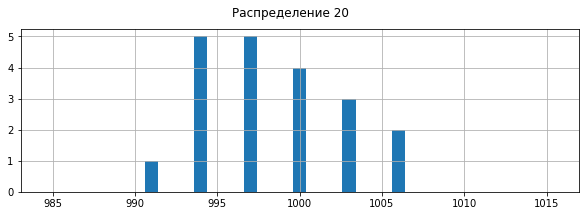

Семплируем из распределения


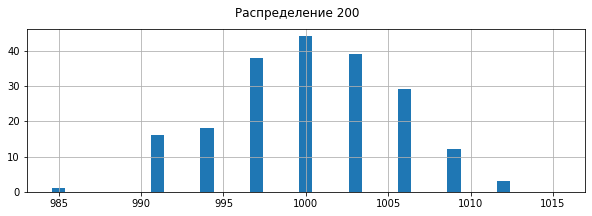

Семплируем из распределения


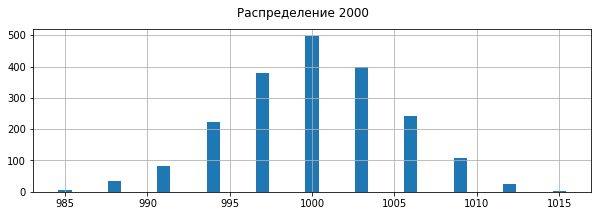

Семплируем из распределения


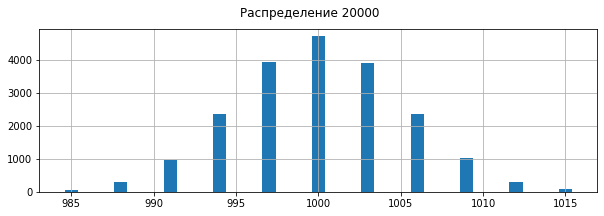

In [ ]:
# границы диапазонов 1000 ± 3*5 => 985 ÷ 1015
rx = []
rb = []
for i in range(985, 1016, 3):
  rx.append(i)
  rb.append(i + 3./2)
print('Пункты:',rx)
rb = rb[:-1]
print('Границы диапазонов:',rb)

def random_normal_distribution(arr_size = 20):
  print('Семплируем из распределения')
  y1 = []
  for i in range(arr_size):
    y1.append(norm(loc=1000, scale=5).rvs())
    # print(y1[-1])
  y1 = sorted(y1)
  # категоризация принадлежности значения одному из диапазонов в массиве
  def add_category(x):
    for i, el in enumerate(rb):
      if x < el:
        return rx[i]
    return rx[len(rb)]
  list_data = [i for i in map(add_category, y1)]
  # print('Принадлежность значений диапазонам:',list_data)
  c = Counter(list_data)

  # print('Выравниваем статистику по массиву распределения')
  rc = []
  for el in rx:
    try:
      rc.append(c[el])
    except KeyError:
      rc.append(0)

  # https://pyprog.pro/mpl/mpl_bar.html
  fig, ax = plt.subplots()
  ax.bar(rx, rc)
  fig.set_figwidth(10)
  fig.set_figheight(3)
  plt.suptitle(f'Распределение {arr_size}')
  plt.grid(True)
  plt.show()


random_normal_distribution(20)

random_normal_distribution(200)

random_normal_distribution(2000)

random_normal_distribution(20000)

Суммы случайных слабозависимых величин, разбитых по категориям, действительно стремятся к **нормальному** распределению

**Возьмём из лекции на рассмотрение задачу 5 для равномерного распределения**

*Цена деления шкалы измерительного прибора равна 0.2. Показания прибора округляются до ближайшего целого деления. Считая, что погрешности округлений распределены равномерно, найти вероятность того, что при очередном измерении она не превзойдёт 0.03.*

Пункты: [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2 ]
Границы диапазонов: [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2]
Семплируем из распределения


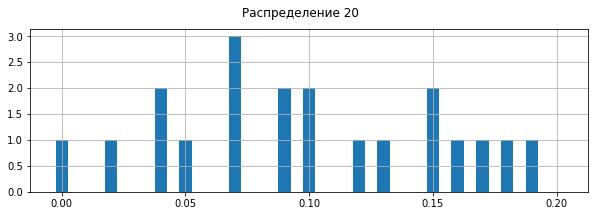

Семплируем из распределения


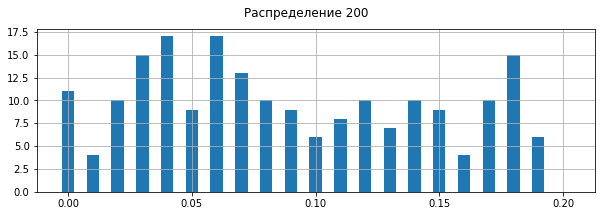

Семплируем из распределения


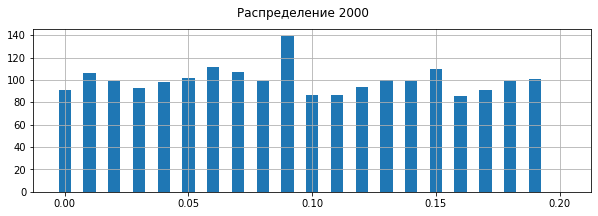

Семплируем из распределения


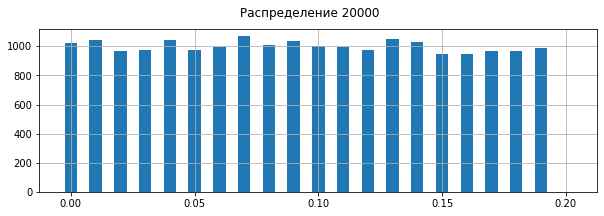

In [ ]:
# границы диапазонов 0 ÷ 0.02
rx = np.linspace(0,0.2,21)
# половинный сдвиг 0.01/2
rb = [round(el+0.01,5) for el in rx]
print('Пункты:',rx)
rb = rb[:-1]
print('Границы диапазонов:',rb)

def random_uniform_distribution(arr_size = 20):
  print('Семплируем из распределения')
  y1 = []
  for i in range(arr_size):
    y1.append(uniform(0,0.2).rvs())
    # print(y1[-1])
  y1 = sorted(y1)
  # категоризация принадлежности значения одному из диапазонов в массиве
  def add_category(x):
    for i, el in enumerate(rb):
      if x < el:
        return rx[i]
    return rx[len(rb)]
  list_data = [i for i in map(add_category, y1)]
  # print('Принадлежность значений диапазонам:',list_data)
  c = Counter(list_data)

  # print('Выравниваем статистику по массиву распределения')
  rc = []
  for el in rx:
    try:
      rc.append(c[el])
    except KeyError:
      rc.append(0)

  # https://pyprog.pro/mpl/mpl_bar.html
  fig, ax = plt.subplots()
  ax.bar(rx, rc, width = 0.005)
  fig.set_figwidth(10)
  fig.set_figheight(3)
  plt.suptitle(f'Распределение {arr_size}')
  plt.grid(True)
  plt.show()


random_uniform_distribution(20)

random_uniform_distribution(200)

random_uniform_distribution(2000)

random_uniform_distribution(20000)

А здесь суммы случайный величин, разбитых по категориям, стремятся к **равномерному** распределению